In [ ]:
import numpy as np
import pandas as pd
import csv
import pickle
import os
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import seaborn as sns
from keras.utils import np_utils
from keras.layers import LSTM, BatchNormalization, SimpleRNN
from keras import Input
import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# enable gpu
from keras import backend as K
K._get_available_gpus()

[]

In [ ]:
def split_tuple(labels):
  label, snr = map(list, zip(*(x.split('_') for x in labels)))
  label,snr=np.array(label),np.array(snr)
  return label,snr

In [ ]:
def create_model():
  number_of_channels = 4 
  vanilla_rnn_model = Sequential()
  vanilla_rnn_model.add(Input(shape=(128,number_of_channels)))
  vanilla_rnn_model.add(SimpleRNN(128))
  vanilla_rnn_model.add(Dense(10, activation='softmax'))
  
  return vanilla_rnn_model  

In [ ]:
samples = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/drev_raw.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/labels.npy')
gc.collect()

431

In [ ]:
# to encode the labels
lb = LabelEncoder()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(samples, labels,test_size=0.3, random_state=1 ,stratify=labels)
del samples
del labels
gc.collect()
# take 5% of training set for validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=1,stratify=y_train)

y_train,snr_train = split_tuple(y_train)
y_test,snr_test = split_tuple(y_test)
y_val,snr_val=split_tuple(y_val)

# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
del y_train
del y_val
gc.collect()

0

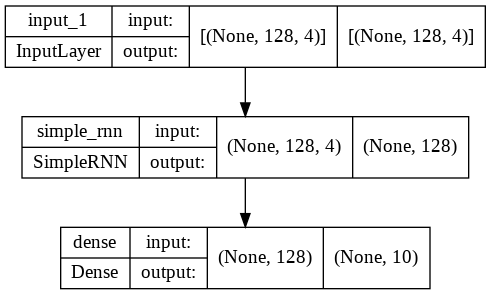

In [ ]:
# create model
model = create_model()
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

# Save an image of the model's architecture to a file
plot_model(model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

Epoch 1/25
12469/12469 [==============================] - 534s 43ms/step - loss: 2.2067 - accuracy: 0.1473 - val_loss: 2.1110 - val_accuracy: 0.1767
Epoch 2/25
12469/12469 [==============================] - 544s 44ms/step - loss: 2.0462 - accuracy: 0.2011 - val_loss: 2.0262 - val_accuracy: 0.2147
Epoch 3/25
12469/12469 [==============================] - 551s 44ms/step - loss: 1.9419 - accuracy: 0.2398 - val_loss: 1.9157 - val_accuracy: 0.2411
Epoch 4/25
12469/12469 [==============================] - 545s 44ms/step - loss: 1.8683 - accuracy: 0.2641 - val_loss: 1.7988 - val_accuracy: 0.2880
Epoch 5/25
12469/12469 [==============================] - 546s 44ms/step - loss: 1.7663 - accuracy: 0.2970 - val_loss: 1.8036 - val_accuracy: 0.2712
Epoch 6/25
12469/12469 [==============================] - 546s 44ms/step - loss: 1.7114 - accuracy: 0.3148 - val_loss: 1.6909 - val_accuracy: 0.3244
Epoch 7/25
12469/12469 [==============================] - 560s 45ms/step - loss: 1.6832 - accuracy: 0.3252

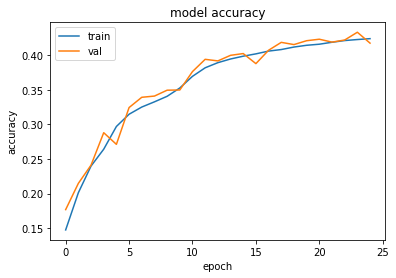

3800

In [ ]:
gc.collect()
model = create_model()
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])
# train model
cnn_results = model.fit(x_train, y_train_lb,
                  epochs = 25,
                  verbose = 1,batch_size=64,
                  validation_data = (x_val, y_val_lb))
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/rnn/derivative_model.h5')
# Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
gc.collect()

Epoch 1/10
24938/24938 [==============================] - 833s 33ms/step - loss: 1.4595 - accuracy: 0.4175 - val_loss: 1.4363 - val_accuracy: 0.4268
Epoch 2/10
24938/24938 [==============================] - 818s 33ms/step - loss: 1.4544 - accuracy: 0.4193 - val_loss: 1.4337 - val_accuracy: 0.4281
Epoch 3/10
24938/24938 [==============================] - 824s 33ms/step - loss: 1.4487 - accuracy: 0.4212 - val_loss: 1.4664 - val_accuracy: 0.4126
Epoch 4/10
24938/24938 [==============================] - 827s 33ms/step - loss: 1.4446 - accuracy: 0.4227 - val_loss: 1.4458 - val_accuracy: 0.4200
Epoch 5/10
24938/24938 [==============================] - 821s 33ms/step - loss: 1.4392 - accuracy: 0.4245 - val_loss: 1.4155 - val_accuracy: 0.4325
Epoch 6/10
24938/24938 [==============================] - 814s 33ms/step - loss: 1.4363 - accuracy: 0.4254 - val_loss: 1.4258 - val_accuracy: 0.4270
Epoch 7/10
24938/24938 [==============================] - 837s 34ms/step - loss: 1.4314 - accuracy: 0.4275

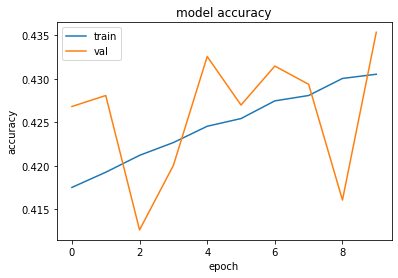

8648

In [ ]:
import keras
gc.collect()
model = keras.models.load_model('derivative_model.h5')
# opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)

# model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])# train model
cnn_results = model.fit(x_train, y_train_lb,
                  epochs = 10,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb))
model.save('derivative_model.h5')
# Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
gc.collect()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/rnn/my_derivative_model.h5')

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/rnn/der_model.h5')

In [ ]:
# train accuracy
score = model.evaluate(x_train, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

Training Accuracy:  0.41976314783096313


In [ ]:
# evaluate test set
# encode labels
y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))

score = model.evaluate(x_test, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Testing Accuracy:  0.4192916750907898


In [ ]:
del y_test
gc.collect()

708

In [ ]:
# to get confusion matrix
y_test_classes = y_test_lb.argmax(1)
y_predicted = model.predict(x_test)
y_pred_classes = np.argmax(y_predicted,axis=1)
classes = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/classes.npy')


In [ ]:
# get confusion matrix
confusion_matrix1 = confusion_matrix(y_true= y_test_classes, y_pred=y_pred_classes)
classes = np.array([x[0] for x in classes])
classes=np.unique(classes)
print(classes)
#Add labels to confusion matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix1, columns=list(classes), index=list(classes))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix1

[b'8PSK' b'AM-DSB' b'BPSK' b'CPFSK' b'GFSK' b'PAM4' b'QAM16' b'QAM64'
 b'QPSK' b'WBFM']
The rows represents the true values or observations
The columns respresent the model's predictions


,b'8PSK',b'AM-DSB',b'BPSK',b'CPFSK',b'GFSK',b'PAM4',b'QAM16',b'QAM64',b'QPSK',b'WBFM'
b'8PSK',12826,53,3402,6378,5090,86,217,1762,4949,1237
b'AM-DSB',333,7002,1143,2943,3576,9,3,18,610,20363
b'BPSK',1420,485,17842,5705,4743,130,32,289,3827,1527
b'CPFSK',813,54,2424,24939,5194,34,11,107,1147,1277
b'GFSK',388,138,1356,4369,26274,14,1,40,680,2740
b'PAM4',2995,355,3327,4432,3717,12737,511,5445,1368,1113
b'QAM16',10056,32,2319,4274,3384,111,1147,11709,2189,779
b'QAM64',9469,25,2084,3208,2454,117,1222,14831,2028,562
b'QPSK',5276,60,4999,6203,4743,84,399,2370,10693,1173
b'WBFM',297,3498,1135,3029,4756,14,1,21,595,22654


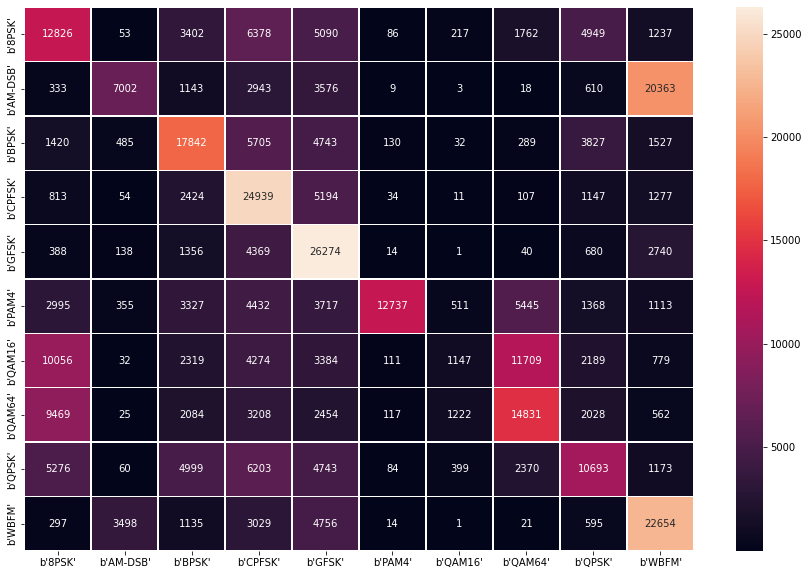

In [ ]:
# get most confusing classes
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(confusion_matrix1, annot=True, linewidths=.5, ax=ax, fmt='g')

In [ ]:
# Print f1, precision, and recall scores
print("Percision: ",precision_score(y_test_classes, y_pred_classes , average="macro"))
print("Recall: ",recall_score(y_test_classes, y_pred_classes , average="macro"))
print("F-score: ",f1_score(y_test_classes, y_pred_classes , average="macro"))

Percision:  0.4617040298683916
Recall:  0.4192916666666666
F-score:  0.39247437062445634


In [ ]:
# group by snr
snr_test = [int(snr) for snr in snr_test]
sorted_snrs = np.sort(np.unique(snr_test))
x = []
y = []
for snr in sorted_snrs:
  idx = np.where(snr_test == snr)
  x.append(snr)
  y.append(accuracy_score(np.argmax(y_test_lb[idx], axis = 1), np.argmax(y_predicted[idx], axis = 1)))


In [ ]:
# print results of snr
pd.DataFrame(data = np.array(y).reshape(1, -1) * 100,  columns = sorted_snrs, index = ['accuracy']).round(2)

,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18
accuracy,10.34,10.96,10.87,12.36,15.02,19.19,24.05,27.45,32.86,44.01,56.92,62.07,62.91,64.02,63.92,64.54,63.99,64.33,64.57,64.21


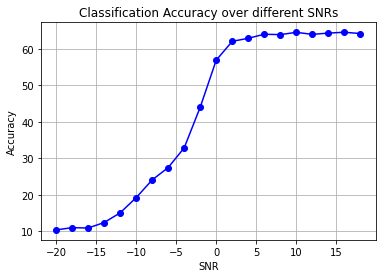

In [ ]:
# plot accuracy vs snr
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy over different SNRs')
plt.plot(x, np.array(y) * 100, 'bo-')
plt.grid(True)